### Variable sharing

scope reuse를 사용해서 graph를 함께 사용하기

In [1]:
""" Examples to demonstrate variable sharing
CS 20: 'TensorFlow for Deep Learning Research'
cs20.stanford.edu
Chip Huyen (chiphuyen@cs.stanford.edu)
Lecture 05
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#sample data
x1 = tf.truncated_normal(shape=[200,100], name='x1')
x2 = tf.truncated_normal(shape=[200,100], name='x2')

In [ ]:
#setting layers using Variable
def two_hidden_layers(x):
    assert x.shape.as_list() == [200, 100]
    w1 = tf.Variable(tf.random_normal([100, 50]), name='h1_weights')
    b1 = tf.Variable(tf.zeros([50]), name='h1_biases')
    h1 = tf.matmul(x, w1) + b1
    assert h1.shape.as_list() == [200, 50]  
    w2 = tf.Variable(tf.random_normal([50, 10]), name='h2_weights')
    b2 = tf.Variable(tf.zeros([10]), name='2_biases')
    logits = tf.matmul(h1, w2) + b2
    return logits

In [3]:
#setting layers using get_variable
def two_hidden_layers_2(x):
    assert x.shape.as_list() == [200,100]
    w1 = tf.get_variable('w1_2', [100,50], initializer=tf.random_normal_initializer())
    b1 = tf.get_variable('b1_2', [50], initializer=tf.constant_initializer(0.0))
    h1 = tf.matmul(x,w1) + b1
    assert h1.shape.as_list() == [200, 50]
    w2 = tf.get_variable('w2_2', [50, 10], initializer=tf.random_normal_initializer())
    b2 = tf.get_variable('b2_2', [10], initializer=tf.constant_initializer(0.0))
    logtis = tf.matmul(h1, w2) + b2
    return logtis

In [ ]:
logit1 = two_hidden_layers(x1)
logit2 = two_hidden_layers(x2)

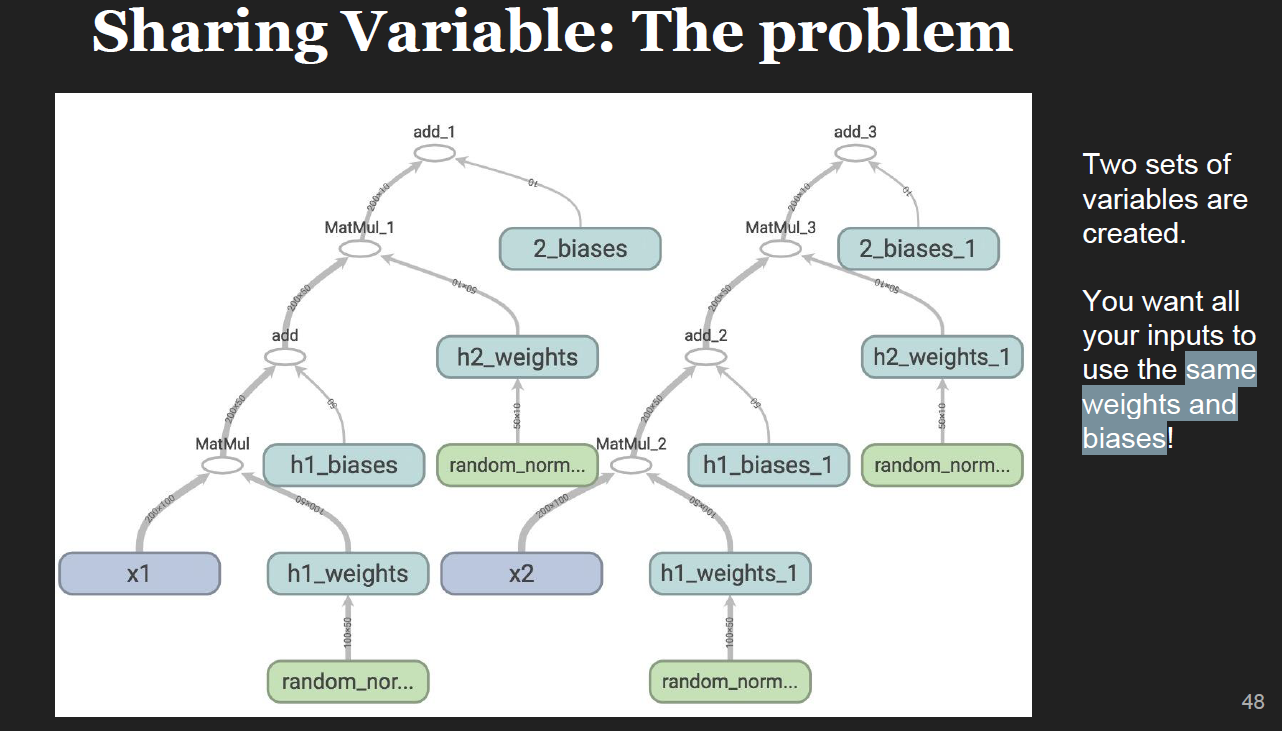

In [5]:
#ValueError
logits1 = two_hidden_layers_2(x1)
logits2 = two_hidden_layers_2(x2)

ValueError: Variable w1_2 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\home\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\home\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\home\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)


In [4]:
with tf.variable_scope('two_layers') as scope:
    logit1 = two_hidden_layers_2(x1)
    scope.reuse_variables()
    logit2 = two_hidden_layers_2(x2)